本教程基于：   
1、[github扩散模型教程](https://github.com/huggingface/diffusion-models-class)    
2、Hugging Face联名图书《扩散模型从原理到实战》  
3、Hugging Face官方网站diffusers文档及扩散模型相关教程    
4、相关论文  
5、自己的实践

什么是diffusers？  
Hugging Face推出的扩散模型工具包，是当前使用最先进预训练扩散模型的首选库，包括但不限于生成图像、音频、视频等。  
为什么要学习diffusers？  
1、几行代码完成扩散模型推理（使用简单）  
2、提供多样的模型和必备组件，构建端到端的扩散模型（快速开发）  
3、背靠全世界最出名的机器学习平台，拥有海量高质量模型和丰富的教学内容（生态完备）

# 第一节 环境安装和hugging face扩散模型演示

## 你将学到什么？
1、环境搭建  
2、hugging face访问  
3、一个基于dreambooth技术微调出的稳定扩散模型示例  

## 1.1 环境搭建

In [ ]:
# gpu 版本 pytorch 安装，默认用户已经装好
# 详情见 https://pytorch.org/get-started/locally/
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# 安装 diffusers
%pip install -qq -U diffusers datasets transformers accelerate ftfy pyarrow
# 安装 huggingface-hub 用于和 huggingface 交互
%pip install huggingface-hub
# 其他依赖，自行解决，少什么装什么

<style>
.hidden-comment {
    color: transparent;
    transition: color 0.3s;
}

.hidden-comment:hover {
    color: black;
}
</style>

## 1.2 hugging face访问

In [2]:
# 访问 https://huggingface.co/settings/tokens 生成有 write 权限的 token 用于登录
from huggingface_hub import notebook_login
notebook_login()

# 如果不是 notebook 环境，程序内调用
# from huggingface_hub import login
# login(token="your token", write_permission=True)

# 命令行调用，调用的方法和上面相同只是进行命令行的封装
# huggingface-cli login

## 1.3 一个基于dreambooth技术微调出的稳定扩散模型示例

### 1.3.1 定义图像显示函数

In [6]:
import os
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from matplotlib import pyplot as plt
from PIL import Image

# 给定一批图像，创建一个网格并将其转换为PIL
def show_images(x):
    x = x * 0.5 + 0.5  # 将（-1，1）区间映射回（0，1）区间
    grid = torchvision.utils.make_grid(x)
    grid_im = grid.detach().cpu().permute(1, 2, 0).clip(0, 1) * 255
    grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
    return grid_im

# 给定一个PIL图像列表，将它们叠加成一行以便查看
def make_grid(images, size=64):
    output_im = Image.new("RGB", (size * len(images), size))
    for i, im in enumerate(images):
        output_im.paste(im.resize((size, size)), (i * size, 0))
    return output_im

device = (
    "mps" if torch.backends.mps.is_available()
    else "cuda" if torch.cuda.is_available()
    else "cpu"
)

# 网络不好，可能需要多尝试几次下载
# 一个下载异常重试的装饰器，对于需要下载的模块避免重复写下载异常判断
import functools

def retry_on_exception(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        while True:
            try:
                return func(*args, **kwargs)
            except Exception as e:
                print(e)
    return wrapper

# 模型数据存放路径，默认放在同一个文件夹
model_zoo_dir = r'E:\model_zoo\huggingface\diffusers'

### 1.3.2 使用 diffusers 管线快速加载扩散模型

In [7]:
# 用dreambooth技术微调出的稳定扩散模型示例，土豆人先生
# dreambooth是做什么的
# google开发团队的解释：
# It’s like a photo booth, but once the subject is captured, it can be synthesized wherever your dreams take you.
# 这就像一个照相亭，但一旦拍摄了主体，它就可以在你梦想的任何地方合成。

from diffusers import StableDiffusionPipeline
# https://huggingface.co/sd-dreambooth-library ，这里有来自社区的各种模型
# 该模型仅仅使用了知名儿童玩具“Mr. Potato Head”（土豆先生）的5张照片
model_id = "sd-dreambooth-library/mr-potato-head"

# 加载管线
# 模型下载路径（可选），最好自定义，方便管理和查找
cache_dir = os.path.join(model_zoo_dir, 'mr-potato-head')

# 用装饰器修饰方法
@retry_on_exception
def load_stable_diffusion_pipeline(model_id, cache_dir, torch_dtype=torch.float32, device='cuda'):
    return StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch_dtype, cache_dir=cache_dir).to(device)
pipe = load_stable_diffusion_pipeline(model_id, cache_dir, torch_dtype=torch.float16, device=device)

text_encoder\model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


### 1.3.3 简单使用，生成自己的土豆先生

  0%|          | 0/50 [00:00<?, ?it/s]

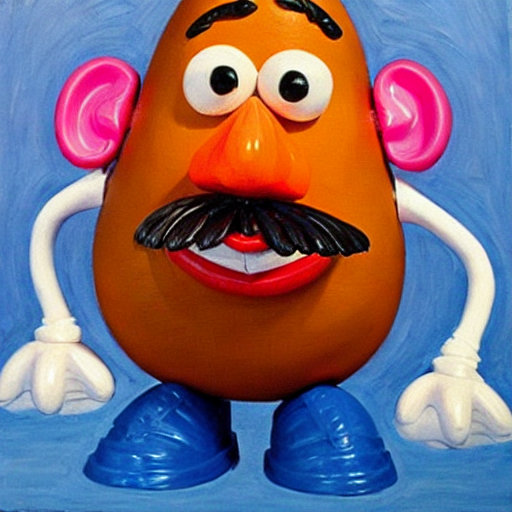

In [8]:
prompt = "an abstract oil painting of sks mr potato head by picasso"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image

# 第二节 用 pytorch 从零搭建扩散模型

## 你将学到什么？  
1、初步了解扩散模型的工作过程  
2、使用 pytorch 深度学习框架搭建自己的简易扩散模型  

（待完成）

# 第三节 通过蝴蝶图像 DDPM 模型探索 diffusers 管线

## 你将学到什么？
1、diffusers API构成    
2、加载DDPM预设管线  
3、训练自己的扩散模型

## 3.1 diffusers AI构成

Diffusers核心API主要分为三部分。  
● 管线：从高层次设计的多种类函数，旨在便于部署的方式实现，能够快速地利用预训练好的主流扩散模型来生成样本。    
● 模型：在训练新的扩散模型时需要用到的网络结构，如UNet模型。  
● 调度器：在推理过程中使用多种不同的技巧来从噪声中生成图像，同时也可以生成训练过程中所需的“带噪”图像。

## 3.2 加载预设的蝴蝶DDPM管线

对于普通用户，能加载预设好的管线已经足够使用。  
但对于学习教程的读者，应该有深入学习的需求，例如：管线的组成、各组件原理、定义自己的管线等。  
我们先展示如何加载预设的管线，后面再深入学习、实践。  

diffusion_pytorch_model.safetensors not found


  0%|          | 0/1000 [00:00<?, ?it/s]

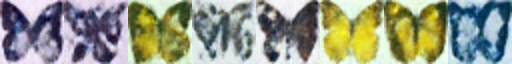

In [28]:
from diffusers import DDPMPipeline

cache_dir = os.path.join(model_zoo_dir, 'ddpm-butterflies-32px')

@retry_on_exception
def load_ddpm_pipeline(model_id, cache_dir, device):
    return DDPMPipeline.from_pretrained(model_id, cache_dir=cache_dir).to(device)

# 加载预设好的管线
butterfly_pipeline = load_ddpm_pipeline('johnowhitaker/ddpm-butterflies-32px', cache_dir, device)

# 生成8张图片
images = butterfly_pipeline(batch_size=8).images

# 输出图片
make_grid(images)

## 3.3 训练自己的蝴蝶扩散模型

训练扩散模型的流程如下：  
（1）从训练集中加载图像。  
（2）添加不同级别的噪声。  
（3）将添加了不同级别噪声的数据输入模型。  
（4）评估模型对这些输入去噪的效果。  
（5）使用得到的性能信息更新模型权重，然后重复上述步骤。  

### 3.3.1下载蝴蝶数据集  
下载1000张蝴蝶数据集

In [29]:
import torchvision
from datasets import load_dataset
from torchvision import transforms

cache_dir = os.path.join(model_zoo_dir, 'smithsonian_butterflies_subset')
@retry_on_exception
def custom_load_dataset(dataset_id, cache_dir, split="train"):
    return load_dataset(dataset_id, cache_dir=cache_dir, split=split)
dataset = custom_load_dataset("huggan/smithsonian_butterflies_subset", cache_dir=cache_dir)
# 也可以从本地文件夹中加载图像
# dataset = load_dataset("imagefolder", data_dir="path/to/folder")
# 我们将在32×32像素的正方形图像上进行训练，但你也可以尝试更大尺寸的图像
image_size = 32
# 如果GPU内存不足，你可以减小batch_size
batch_size = 64
# 定义数据增强过程
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # 调整大小
        transforms.RandomHorizontalFlip(),            # 随机翻转
        transforms.ToTensor(),              # 将张量映射到(0,1)区间
        transforms.Normalize([0.5], [0.5]), # 映射到(-1, 1)区间
    ]
)
def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}

dataset.set_transform(transform)
# 创建一个数据加载器，用于批量提供经过变换的图像
train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

Found cached dataset parquet (E:/model_zoo/huggingface/diffusers/smithsonian_butterflies_subset/huggan___parquet/huggan--smithsonian_butterflies_subset-7665b1021a37404c/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


C:\Users\zyan\AppData\Local\Temp\ipykernel_42648\1687247206.py:4: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  show_images(xb).resize((8 * 64, 64), resample=Image.NEAREST)


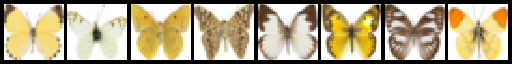

In [30]:
# 输出八张看一下
xb = next(iter(train_dataloader))["images"].to(device)[:8]
print("X shape:", xb.shape)
show_images(xb).resize((8 * 64, 64), resample=Image.NEAREST)

### 3.3.2 调度器  
在训练扩散模型的过程中，我们需要获取这些输入图像并为它们添加噪声，然后将“带噪”的图像输入模型。在推理阶段，我们将使用模型的预测结果逐步消除这些噪声。在扩散模型中，这两个步骤是由调度器（scheduler）处理的。  
噪声调度器能够确定在不同迭代周期分别添加多少噪声。接下来，我们将学习如何使用 DDPM训练和采样的默认设置来创建调度程序（基于论文 “Denoising Diffusion Probabilistic Models”），代码如下：

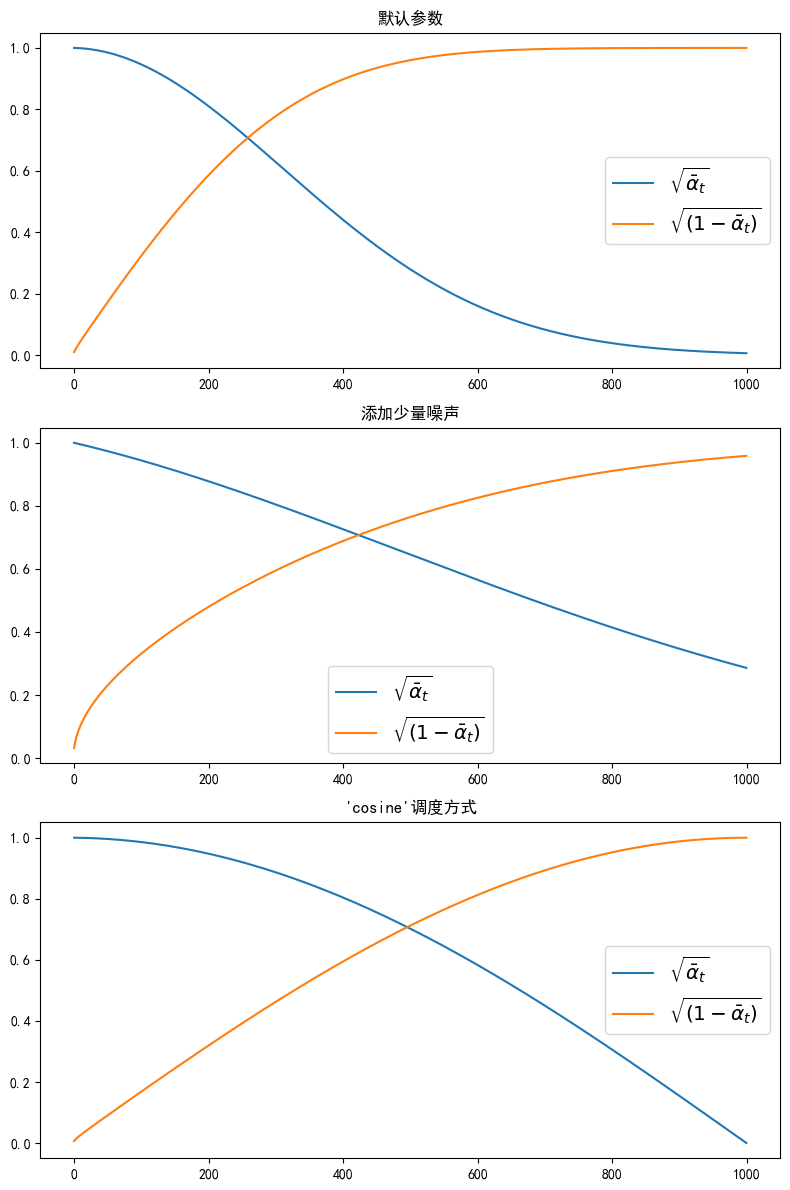

In [31]:
# 我们可以通过设置beta_start、beta_end和beta_schedule 3个参数来控制噪声调度器的超参数beta
# beta_start为控制推理阶段开始时beta的值，beta_end为控制beta的最终值，beta_schedule则可以通过一个函数映射来为模型推理的每一步生成一个beta值

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为 SimHei
plt.rcParams['axes.unicode_minus'] = False  # 为了正常显示负号

from diffusers import DDPMScheduler

noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
# 使用 plt.subplots 创建 3 个子图
fig, axes = plt.subplots(nrows=3, figsize=(8, 12))

# 默认参数
axes[0].plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
axes[0].plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
axes[0].legend(fontsize="x-large")
axes[0].set_title("默认参数")

# # 仅添加了少量噪声
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_start=0.001, beta_end=0.004)
axes[1].plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
axes[1].plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
axes[1].legend(fontsize="x-large")
axes[1].set_title("添加少量噪声")

# 'cosine'调度方式，这种方式可能更适合尺寸较小的图像
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule='squaredcos_cap_v2')
axes[2].plot(noise_scheduler.alphas_cumprod.cpu() ** 0.5, label=r"${\sqrt{\bar{\alpha}_t}}$")
axes[2].plot((1 - noise_scheduler.alphas_cumprod.cpu()) ** 0.5, label=r"$\sqrt{(1 - \bar{\alpha}_t)}$")
axes[2].legend(fontsize="x-large")
axes[2].set_title("'cosine'调度方式")

plt.tight_layout()
plt.show()

C:\Users\zyan\AppData\Local\Temp\ipykernel_42648\2011628523.py:7: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  show_images(noisy_xb).resize((8 * 64, 64), resample=Image.NEAREST)


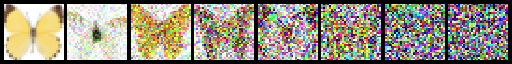

In [32]:
# 对上面抽出来的八张图逐步加噪声观察输出
# 使用上面定义的DDPM调度器执行添加噪声的工作
timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb)
noisy_xb = noise_scheduler.add_noise(xb, noise, timesteps)
print("Noisy X shape", noisy_xb.shape)
show_images(noisy_xb).resize((8 * 64, 64), resample=Image.NEAREST)

### 3.3.3 定义扩散模型  
大多数扩散模型使用的模型结构是一些UNet模型的变体。  
UNet模型的工作流程如下：  
（1）输入UNet模型的图片会经过几个ResNet层中的标准网络模块，并且在经过每个标准网络模块后，图片的尺寸都将减半。  
（2）同样数量的上采样层则能够将图片的尺寸恢复到原始尺寸。  
（3）跳跃连接模块会将特征图分辨率相同的上采样层和下采样层连接起来。  
UNet模型的一个关键特征是其输出图片的尺寸与输入图片的尺寸相同，而这正是我们在扩散模型中所需要的。
![unet](../images/unet.jpg)

In [33]:
# 创建扩散模型

from diffusers import UNet2DModel
# 创建模型
model = UNet2DModel(
    sample_size=image_size,   # 目标图像分辨率
    in_channels=3,            # 输入通道数，对于RGB图像来说，通道数为3 
    out_channels=3,           # 输出通道数
    layers_per_block=2,       # 每个UNet块使用的ResNet层数
    block_out_channels=(64, 128, 128, 256), # 更多的通道→更多的参数
    down_block_types=(
        "DownBlock2D",        # 一个常规的ResNet下采样模块
        "DownBlock2D",
        "AttnDownBlock2D",    # 一个带有空间自注意力的ResNet下采样模块
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",      # 一个带有空间自注意力的ResNet上采样模块
        "UpBlock2D",
        "UpBlock2D",          # 一个常规的ResNet上采样模块
    ),
)
model.to(device);
# 输入上面加噪声的蝴蝶图，查看输出维度是否和输入一致
print(noisy_xb.shape)
with torch.no_grad():
    model_prediction = model(noisy_xb, timesteps).sample
model_prediction.shape

torch.Size([8, 3, 32, 32])

### 3.3.4 创建扩散模型训练循环  
这是一个pytorch训练的经典循环。  
每一批数据的训练流程如下：  
（1）随机地采样几个迭代周期。  
（2）对数据进行相应的噪声处理。  
（3）把“带噪”数据输入模型。  
（4）将MSE作为损失函数，比较目标结果与模型的预测结果。在这个示例中，也就是比较真实噪声和模型预测的噪声之间的差距。  
（5）通过调用函数loss.backward()和optimizer.step()来更新模型参数。  
在这个过程中，我们需要记录每一步中损失函数的值，用于后续绘制损失曲线，代码如下：

In [22]:
# 设定噪声调度器
noise_scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_schedule="squaredcos_cap_v2"
)
# 训练循环
optimizer = torch.optim.AdamW(model.parameters(), lr=4e-4)

# 也可以直接使用管线中的模型，当然前面删除了需要重新加载
# 可以自行对比两者效果
#cache_dir = r'E:\model_zoo\huggingface\diffusers\ddpm-butterflies-32px'
#butterfly_pipeline = load_ddpm_pipeline('johnowhitaker/ddpm-butterflies-32px', cache_dir, device)
#model = butterfly_pipeline.unet

losses = []
for epoch in range(30):
    for step, batch in enumerate(train_dataloader):
        clean_images = batch["images"].to(device)
        # 为图片添加采样噪声
        noise = torch.randn(clean_images.shape).to(clean_images.device)
        bs = clean_images.shape[0]

        # 为每张图片随机采样一个时间步
        timesteps = torch.randint(
            0, noise_scheduler.num_train_timesteps, (bs,), 
            device=clean_images.device
        ).long()

        # 根据每个时间步的噪声幅度，向清晰的图片中添加噪声
        noisy_images = noise_scheduler.add_noise(clean_images, noise, timesteps)

        # 获得模型的预测结果
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]

        # 计算损失
        loss = F.mse_loss(noise_pred, noise)
        loss.backward(loss)
        losses.append(loss.item())

        # 迭代模型参数
        optimizer.step()
        optimizer.zero_grad()
    if (epoch + 1) % 5 == 0:
        loss_last_epoch = sum(losses[-len(train_dataloader) :]) / len(train_dataloader)
        print(f"Epoch:{epoch+1}, loss: {loss_last_epoch}")

E:\ProgramData\Anaconda3\envs\test\lib\site-packages\diffusers\configuration_utils.py:135: FutureWarning: Accessing config attribute `num_train_timesteps` directly via 'DDPMScheduler' object attribute is deprecated. Please access 'num_train_timesteps' over 'DDPMScheduler's config object instead, e.g. 'scheduler.config.num_train_timesteps'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)


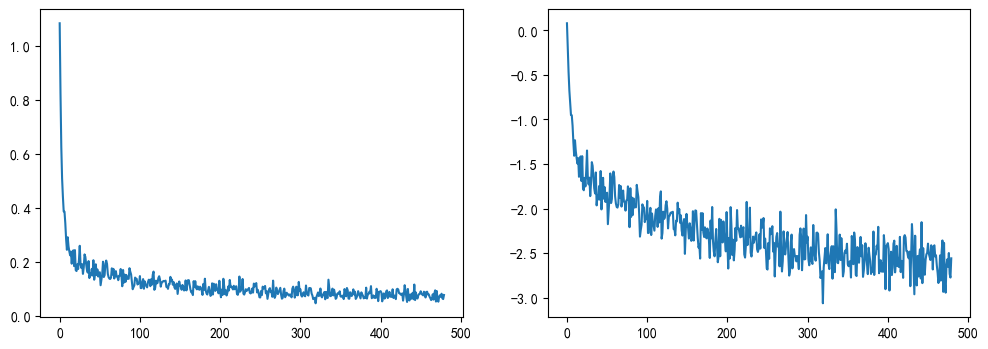

In [23]:
# 绘制损失曲线
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(losses)
axs[1].plot(np.log(losses))
plt.show()

### 3.3.5 图像的生成  

怎么使用我们刚刚训练的模型？

#### 方法一 建立管线

  0%|          | 0/1000 [00:00<?, ?it/s]

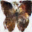

In [24]:
from diffusers import DDPMPipeline

image_pipe = DDPMPipeline(unet=model, scheduler=noise_scheduler)
pipeline_output = image_pipe()
pipeline_output.images[0]

In [25]:
# 自定义保存文件夹
import json
from pathlib import Path

# 在 windows 平台保存可能会出现问题（其他平台未测试），原因和解决方法如下：
# 如果直接给字符串，Hugging Face 的方法会解析为一个 WindowsPath 对象，WindowsPath对象是不可以直接被JSON序列化的，会报错。
# 我们定义了一个自定义的ExtendedJSONEncoder，它可以处理Path对象（这包括WindowsPath和PosixPath）。然后，我们将其设置为默认的JSON编码器。

# 定义自定义的JSONEncoder来处理WindowsPath
class ExtendedJSONEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, Path):
            return str(obj)
        return super().default(obj)

# 设置这个新的JSON编码器为默认编码器
json.JSONEncoder.default = ExtendedJSONEncoder().default

save_dir = os.path.join(model_zoo_dir, 'my_pipeline')
image_pipe.save_pretrained(save_dir)

#### 方法二 采样循环

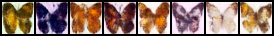

In [26]:
# 随机初始化（8张随机图片）
print("时间步：", noise_scheduler.timesteps)
sample = torch.randn(8, 3, 32, 32).to(device)
for i, t in enumerate(noise_scheduler.timesteps):

    # 获得模型的预测结果
    with torch.no_grad():
        residual = model(sample, t).sample

    # 根据预测结果更新图像
    sample = noise_scheduler.step(residual, t, sample).prev_sample

show_images(sample)

# 思考：为什么时间步是从大到小？
# 回答：因为我们在时间上其实是倒退的，整个过程是从高噪声到低噪声的（与前向扩散过程相反）。prev_sample 意为 previous sample 很好地说明这一点。